In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [141]:
customers = pd.read_csv('/kaggle/input/zeotap-1/Customers.csv')
products = pd.read_csv('/kaggle/input/zeotap-1/Products.csv')
transactions = pd.read_csv('/kaggle/input/zeotap-1/Transactions.csv')


In [142]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
data = data.drop(columns=['Price_x'])
data = data.rename(columns={'Price_y': 'Price'})

In [143]:
features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()


In [144]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['TotalValue', 'Quantity', 'Price']])


In [145]:
kmeans = KMeans(n_clusters=5, random_state=42,  n_init=10)
features['Cluster'] = kmeans.fit_predict(scaled_features)

In [152]:
from sklearn.metrics import davies_bouldin_score , silhouette_score
db_index = davies_bouldin_score(scaled_features, features['Cluster'])
print('DB Index:', db_index)
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

DB Index: 0.8381033044288835
Inertia: 162.5740595465871


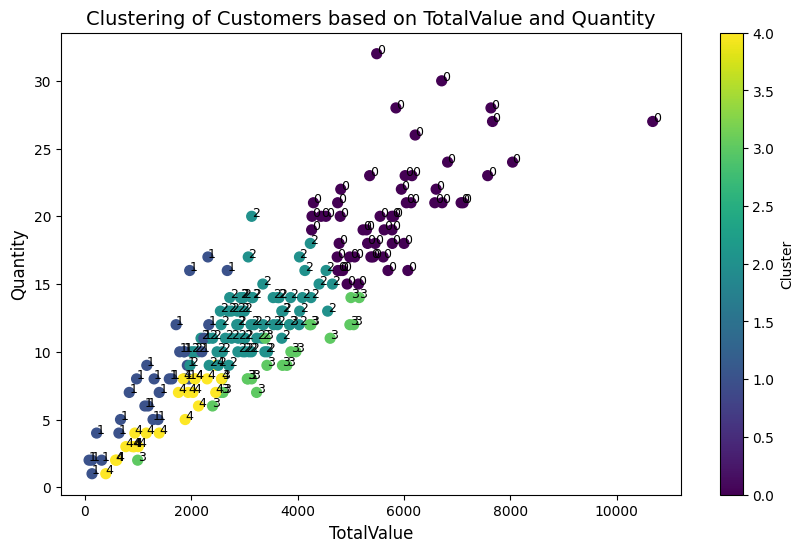

In [147]:
plt.figure(figsize=(10, 6))

# Scatter plot for TotalValue vs Quantity
plt.scatter(features['TotalValue'], features['Quantity'], c=features['Cluster'], cmap='viridis', s=50)

plt.title('Clustering of Customers based on TotalValue and Quantity', fontsize=14)
plt.xlabel('TotalValue', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

for i, txt in enumerate(features['Cluster']):
    plt.annotate(txt, (features['TotalValue'][i], features['Quantity'][i]), fontsize=9)

plt.colorbar(label='Cluster')

plt.show()

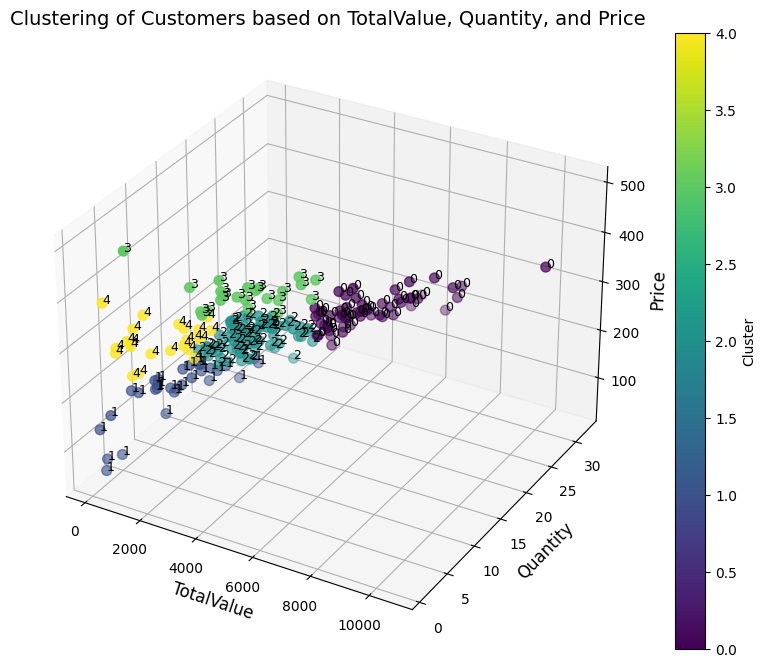

In [149]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(features['TotalValue'], features['Quantity'], features['Price'], 
                     c=features['Cluster'], cmap='viridis', s=50)

ax.set_title('Clustering of Customers based on TotalValue, Quantity, and Price', fontsize=14)
ax.set_xlabel('TotalValue', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_zlabel('Price', fontsize=12)

for i, txt in enumerate(features['Cluster']):
    ax.text(features['TotalValue'][i], features['Quantity'][i], features['Price'][i], str(txt), fontsize=9)

fig.colorbar(scatter, label='Cluster')

plt.show()